## Domača naloga 3
### Marko Tacer, 23222087

Pri nalogi 2 smo signal generirali s pomočjo generatorja. Izmerili smo ga na priključku 2 in tudi na priključku 1, katerega meritve so brezpomenske. Definirali smo obliko signala, frekvenco in amplitudo. Določili smo tudi frekvenco vzorčenja in število meritev v posameznem zajemu. Kot vidimo spodaj so meritve kanala 2 smiselne, medtem ko so meritve na kanalu 1 sicer podobne, a brezpredmetne in neuporabne. 

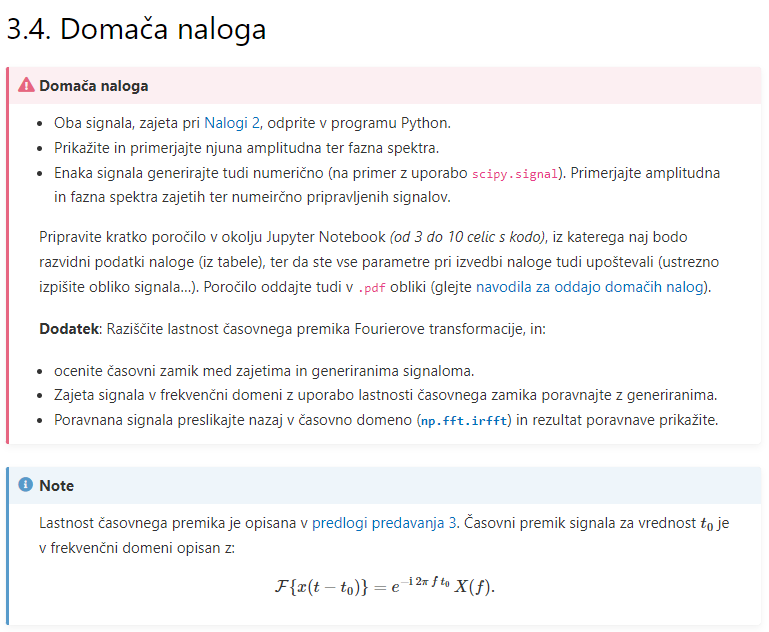

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import lvm_read
from scipy import signal
from scipy.signal import find_peaks

file = 'marko-sin.lvm'
loaded_data = lvm_read.read(file)
data = loaded_data[0]['data'].T
loaded_data.keys()

t = data[0]
kanal_1_sin = data[1]
kanal_2_sin = data[2]

def limiti(kanal):
    '''Vzame podatek o kanalu, ki ga obravnava
    Vrne Povprečno vrednost spodnjih in zgornjih limit'''
    peaks1, _ = find_peaks(kanal, distance=4)
    lows1, _ = find_peaks(-kanal, distance=4)
    A2 = np.average(kanal[peaks1])
    A1 = np.average(kanal[lows1])
    return A1, A2

A1_sin, A2_sin = limiti(kanal_1_sin)
offset_sin = (A1_sin+A2_sin)*0.5

file = 'marko-square.lvm'
loaded_data = lvm_read.read(file)
data = loaded_data[0]['data'].T
loaded_data.keys()

kanal_1_square = data[1]
kanal_2_square = data[2]

A1_square, A2_square = limiti(kanal_1_square)
offset_square = (A1_square+A2_square)*0.5

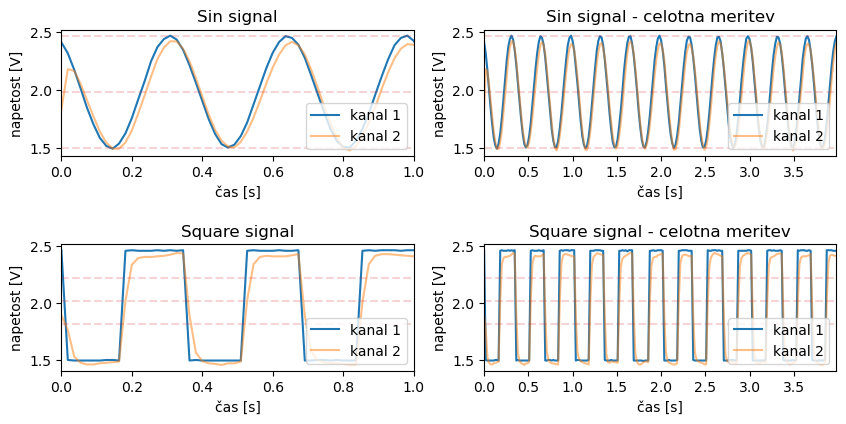

In [9]:
fig = plt.figure(figsize=(10, 10))
plt.subplots_adjust(
                    # left=0.1,
                    # bottom=0.1,
                    # right=0.9,
                    # top=0.9,
                    wspace=0.2,
                    hspace=0.7)

plt.subplot(4,2,1)
plt.gca().set_title('Sin signal')
plt.plot(t, kanal_1_sin, label='kanal 1')
plt.plot(t, kanal_2_sin, label='kanal 2', alpha=0.5)
plt.xlabel('čas [s]')
plt.ylabel('napetost [V]')
L1 = int(0.25*len(t))
plt.xlim(0, t[L1])
plt.hlines(A1_sin, 0, 50, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(A2_sin, 0, 50, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(offset_sin, 0, 50, linestyles="dashed", color='C3', alpha=0.2)
plt.legend(loc='lower right')

Tp = t[-1]
plt.subplot(4,2,2)
plt.gca().set_title('Sin signal - celotna meritev')
plt.plot(t, kanal_1_sin, label='kanal 1')
plt.plot(t, kanal_2_sin, label='kanal 2', alpha=0.5)
plt.xlabel('čas [s]')
plt.ylabel('napetost [V]')
plt.xlim(0, Tp)
plt.hlines(A1_sin, 0, Tp, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(A2_sin, 0, Tp, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(offset_sin, 0, Tp, linestyles="dashed", color='C3', alpha=0.2)
plt.legend(loc='lower right')

plt.subplot(4,2,3)
plt.gca().set_title('Square signal')
plt.plot(t, kanal_1_square, label='kanal 1')
plt.plot(t, kanal_2_square, label='kanal 2', alpha=0.5)
plt.xlabel('čas [s]')
plt.ylabel('napetost [V]')
L1 = int(0.25*len(t))
plt.xlim(0, t[L1])
plt.hlines(A1_square, 0, 50, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(A2_square, 0, 50, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(offset_square, 0, 50, linestyles="dashed", color='C3', alpha=0.2)
plt.legend(loc='lower right')

Tp = t[-1]
plt.subplot(4,2,4)
plt.gca().set_title('Square signal - celotna meritev')
plt.plot(t, kanal_1_square, label='kanal 1')
plt.plot(t, kanal_2_square, label='kanal 2', alpha=0.5)
plt.xlabel('čas [s]')
plt.ylabel('napetost [V]')
plt.xlim(0, Tp)
plt.hlines(A1_square, 0, Tp, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(A2_square, 0, Tp, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(offset_square, 0, Tp, linestyles="dashed", color='C3', alpha=0.2)
plt.legend(loc='lower right')

plt.show()
# print(f'Zgornja lim: {A1_sin:.3f}')
# print(f'Spodnja lim: {A2_sin:.3f}')
# print(f'Amplituda: {(A2_sin - A1_sin):.3f}')
# print(f'DC offset: {((A1_sin+A2_sin)*0.5):.3f}')

## Fourier

In [26]:
dt = t[2] - t[1]
freq = np.fft.fftfreq(len(t), dt)
Frekvenca = 3;
Amplituda = 0.9/2
freq_re = np.fft.rfftfreq(len(t), dt)

x_sin = Amplituda * np.sin(2*np.pi * Frekvenca * t + 0.6 * np.pi) + 2
X_sin = np.fft.rfft(x_sin, norm="forward")
X_sin_re = np.fft.rfft(kanal_1_sin, norm="forward")

x_square = Amplituda * signal.square(2 * np.pi * Frekvenca * t + 0.9 * np.pi) + 2
X_square = np.fft.rfft(x_square, norm="forward")
X_square_re = np.fft.rfft(kanal_1_square, norm="forward")

(0.0, 25.0)

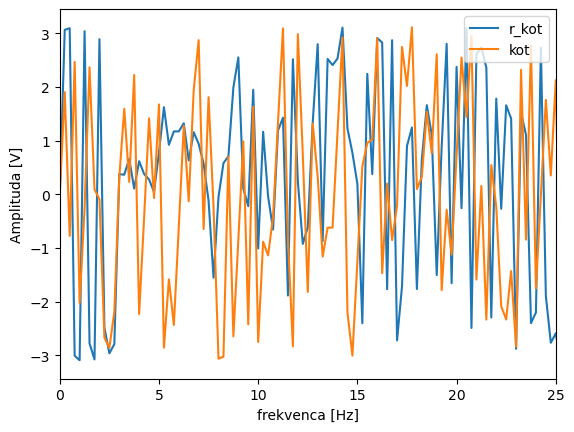

In [32]:
plt.plot(freq_re, np.angle(X_sin_re), label='r_kot')
plt.plot(freq_re, np.angle(X_sin), label='kot')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Amplituda [V]')
plt.legend(loc='upper right')
plt.xlim(0,25)

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 25.0)

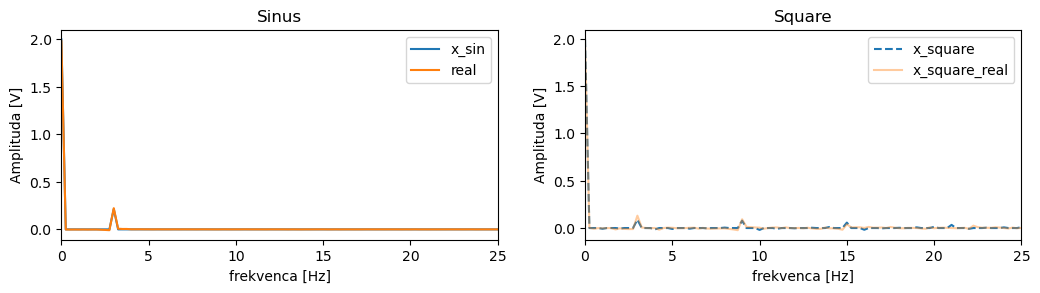

In [29]:
fig = plt.figure(figsize=(12, 16))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.7)

plt.subplot(4,2,1)
plt.gca().set_title('Sinus')
plt.plot(freq_re, X_sin, label='x_sin')
plt.plot(freq_re, X_sin_re, label='real')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Amplituda [V]')
plt.legend(loc='upper right')
plt.xlim(0,25)

Tp = t[-1]
plt.subplot(4,2,2)
plt.gca().set_title('Square')
plt.plot(freq_re, X_square, '--', label='x_square')
plt.plot(freq_re, X_square_re, alpha=0.4,  label='x_square_real')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Amplituda [V]')
plt.legend(loc='upper right')
plt.xlim(0,25)

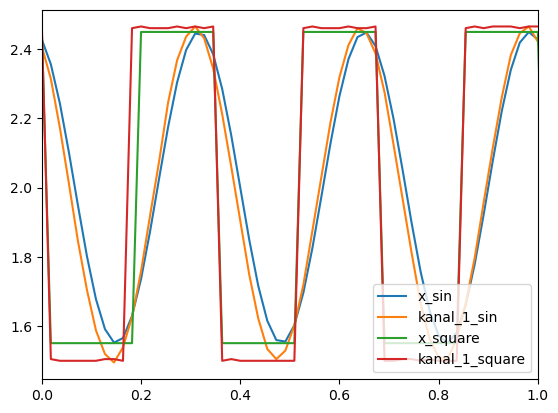

In [12]:
plt.plot(t, x_sin, label='x_sin')
plt.plot(t, kanal_1_sin, label='kanal_1_sin')
plt.plot(t, x_square, label='x_square')
plt.plot(t, kanal_1_square, label='kanal_1_square')
plt.xlim(0, 1)
plt.legend(loc='lower right')

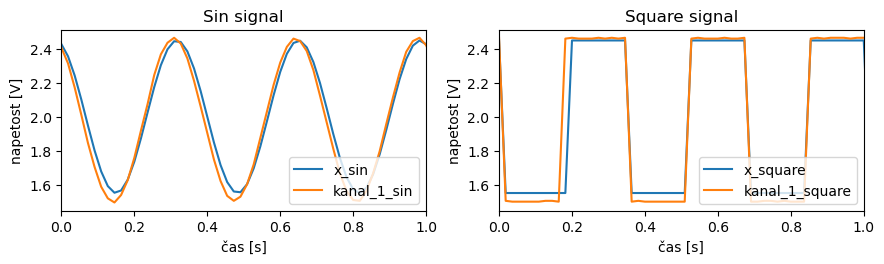

In [13]:
fig = plt.figure(figsize=(16, 8))

plt.subplot(3,3,1)
plt.gca().set_title('Sin signal')
plt.plot(t, x_sin, label='x_sin')
plt.plot(t, kanal_1_sin, label='kanal_1_sin')
plt.xlabel('čas [s]')
plt.ylabel('napetost [V]')
L1 = int(0.25*len(t))
plt.xlim(0, t[L1])
plt.legend(loc='lower right')

Tp = t[-1]
plt.subplot(3,3,2)
plt.gca().set_title('Square signal')
plt.plot(t, x_square, label='x_square')
plt.plot(t, kanal_1_square, label='kanal_1_square')
plt.xlabel('čas [s]')
plt.ylabel('napetost [V]')
plt.xlim(0, t[L1])
plt.legend(loc='lower right')

plt.show()

In [14]:
X_r_sin = np.fft.rfft(kanal_1, norm="forward")
freq_r = np.fft.rfftfreq(len(t), dt)

NameError: name 'kanal_1' is not defined

In [15]:
plt.plot(freq, np.abs(X), '.-', label='Numpy FFT poljubnega signala')
plt.plot(freq_r, np.abs(X_r), '.-', label='Numpy FFT realnega signala')
plt.xlim(1, 5)

NameError: name 'X' is not defined

In [ ]:
max(np.abs(X)[10:100]), np.abs(X)[12]

(0.22500002752206147, 0.22500002752206147)

## Aproksimacija

Spodaj je prikazana aproksimacija na enem od zajetih segmentov. Aproksimacija je izvedena s pomočjo funkcij *InterpolatedUnivariateSpline* in *UnivariateSpline*. Prva naredi podobno, kot če pri *UnivariateSpline* definiramo faktor *"smooth"* : $s=0$. 

In [ ]:
import scipy
i = 2
AA = 50*i 
BB = (i+1)*50         # obseg obravnavanega signala, v morem primeru i-ti segment

# https://jankoslavic.github.io/pynm/notebooks/Predavanje%2008%20-%20Aproksimacija.html#aproksimacija-s-poljubno-funkcijo

spline1 = scipy.interpolate.InterpolatedUnivariateSpline(N[AA:BB], kanal_2[AA:BB]) 
#dejansko niterpolacija, ne aproksimacija (uporabi vse točke)

spline2 = scipy.interpolate.UnivariateSpline(N[AA:BB], kanal_2[AA:BB], s=0.1) #močan faktor "smooth": s =0.1

fig = plt.figure(figsize=(8, 4))
plt.suptitle(f'Aproksimacija s scipy: segment {i}')
plt.plot(N[AA:BB], kanal_2[AA:BB], label='Meritev kanal 2')
plt.plot(N[AA:BB], spline1(N[AA:BB]), '--', alpha=0.5, lw=3, label='InterpolatedUnivariateSpline')
plt.plot(N[AA:BB], spline2(N[AA:BB]), '-.', alpha=0.5, lw=2, label='UnivariateSpline')
plt.xlabel('podatek [/]')
plt.ylabel('napetost [V]')
plt.hlines(0.5, 0, 50, linestyles="dashed", color='C4', alpha=0.2)
plt.hlines(1.5, 0, 50, linestyles="dashed", color='C4', alpha=0.2)
plt.xlim(0, 50)
plt.ylim(0.2, 1.6)
plt.legend(loc='upper right')
plt.grid(which='both')
plt.show()

ValueError: x and y should have a same length

## Numerično integriranje

Za numerično integracijo bom uporabili orodje *scipy.integrate.trapezoid*, kot eno izmed možnosti. Za teoretičen signal bi integral enega segmenta mojega signala moral biti enak *offset* $\cdot$ *dolžina segmenta*. V mojem primeru je to 1 $\cdot$ 0.5 = 0.5.
Dejanski zajet signal je v y-smeri zamaknjen nekoliko manj kot 1, zato je tudi izračunan integral nekoliko manj kot 0,5.

Pojavi se odstopanje na 3 decimalki, a je to ob uporabi trapezoid metode pričakovano.

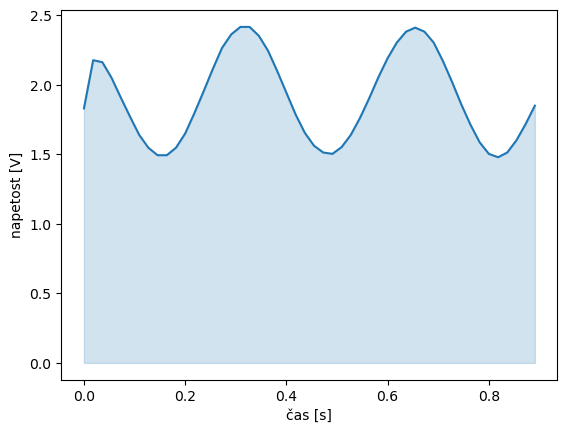

Integracija s scipy: 			 0.9335 
Integracija referenčna (teoretična): 	 0.9329 


In [ ]:
i = 0
AA = 50*i 
BB = (i+1)*50 

I_trapezoid = scipy.integrate.trapezoid(kanal_2[AA:BB], dx=0.01, axis=-1)#t[AA:BB])
I_ref = np.average(kanal_2[AA:BB]) * 0.49

plt.plot(t[AA:BB], kanal_2[AA:BB])
plt.fill_between(t[AA:BB], 0, kanal_2[AA:BB], color='C0', alpha=0.2)
plt.xlabel('čas [s]')
plt.ylabel('napetost [V]')
plt.show()
print(f'Integracija s scipy: \t\t\t {I_trapezoid:.4f} ')
print(f'Integracija referenčna (teoretična): \t {I_ref:.4f} ')


## Filtriranje visokofrekvenčnega šuma

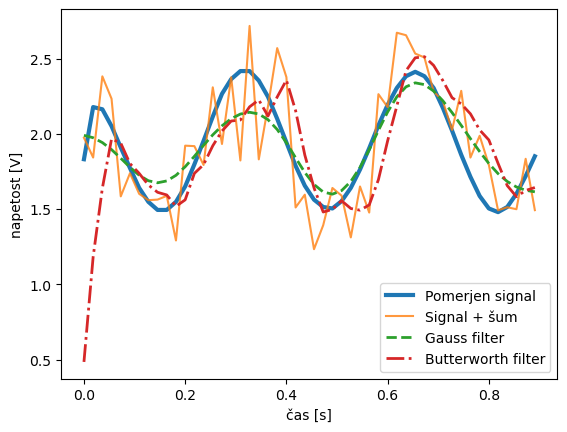

In [ ]:
from scipy import signal, ndimage

kanal_2 = kanal_2[:50]
k2 = kanal_2 + 0.25 * np.random.normal(0,1,50)
t = t[:50]

trajanje = 0.5
sample_rate = 100

s1 = ndimage.gaussian_filter1d(k2, sigma=3) #sigma nam nekako definira, koliko točk okolice naj upošteva z gausovo obtežitvijo
s2 = signal.sosfilt(signal.butter(1, 10, fs=sample_rate, output='sos'), k2)
# najprej naredimo filter: naredi fade out z "jakostjo" 1 od frekvence 10Hz dalje. Vemo, da je šum višje-frekvenčni od osnovne 
# frekvence (ki je 1Hz, zato lahko filtriramo od npr.10Hz dalje)

plt.plot(t, kanal_2, lw=3, label='Pomerjen signal')
plt.plot(t, k2, label='Signal + šum', alpha=0.8)
plt.plot(t, s1, '--', lw=2, label='Gauss filter')
plt.plot(t, s2, '-.', lw=2, label='Butterworth filter')
plt.legend()
plt.xlabel('čas [s]')
plt.ylabel('napetost [V]')
plt.show()

Vidimo, da je filtracija relativno uspešna. V našem primeru je filter Gauss nekoliko boljši, a bi se s poigravanjem s parametri Butter filtra dalo drugi filter še izboljšati